In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from ipywidgets import interactive,widgets
import time
import matplotlib.pyplot as plt
#%matplotlib tk

In [2]:
from golden_section_fx_gx import *
from fx_fun import *
from gx_fun import *

In [3]:
from qpsolvers import solve_qp,quadprog_solve_qp
#https://pypi.org/project/qpsolvers/

In [20]:
def BFGS(angle,angle2,dimensions,colormap,vmax,alpha):
    import time
    import matplotlib.pyplot as plt
    from numpy import arange,meshgrid,zeros,matrix,asarray,transpose,amax,amin,ones,dot,linalg,append,eye,array,linspace\
    ,dot,matmul
    from scipy.optimize import linprog
    from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter#,set_scale
    from matplotlib.pyplot import xlim,ylim,legend,title,xlabel,ylabel
    
    DVn=2
    H=eye(DVn)
    Hk=eye(DVn)
    
    xk=array([-1.,3.5])
    Rk=2
    delta=.1
    tol=.0001
    k=0
    iterN=int(0)
    fk,dfk=fx_fun(xk)
    ck=dfk
    iter_x_history=[xk[0]]
    iter_y_history=[xk[1]]
    iter_f_history=[fk]
    iterloop=0
    
    
    xs1=linspace(-2.1,1,50)
    xs2=linspace(-.6,4.5,50)
    [x1,x2]=meshgrid(xs1,xs2)
    a=len(x1)
    b=len(x2)
    f=zeros([a,b])
    g1=zeros([a,b])
    g2=zeros([a,b])
    g3=zeros([a,b])
    g4=zeros([a,b])

    for i in range(a):
        for j in range(b):
            xi=[x1[i,j],x2[i,j]]
            #print("xi:"+str(xi))#really big if unsupressed
            fk,dfk=fx_fun(xi)
            gk,dgk,h,dh=gx_fun(xi)
            f[i,j]=fk
            g1[i,j]=gk[0]
            g2[i,j]=gk[1]
            g3[i,j]=gk[2]
            g4[i,j]=gk[3]
    if dimensions==2:
        fig,ax=plt.subplots()
        CS2=ax.contourf(x1,x2,f,1000,vmin=0,vmax=vmax,cmap=str(colormap))#levels=[4.6,5,7.5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
        colorbar=plt.colorbar(CS2)
        colorbar.set_label("Objective Function Value",fontsize=24)
        #ax.clabel(CS,CS.levels,inline=True,fontsize=12)
        cv1=asarray([0.001, 0.0011])
        cv1=cv1*amax(g1)
        ax.contour(x1,x2,g1,cv1,cmap='Greys')
        cv2=asarray([0.001, 0.0011])*amax(g2)
        ax.contour(x1,x2,g2,cv2,cmap='Greys')
        cv3=asarray([0.001, 0.0015])*amax(g3)
        ax.contour(x1,x2,g3,cv3,cmap='Greys')
        cv4=asarray([0.05, 0.0499])*amin(g4)
        ax.contour(x1,x2,g4,cv4,cmap='Greys')
        fig.set_size_inches(14*2, 9*2) 
    xlim([min(xs1),max(xs1)])
    ylim([min(xs2),max(xs2)])
    
    start=time.perf_counter()
    while 1:
        

        fk,dfk=fx_fun(xk)
        gk,dgk,hk,dhk=gx_fun(xk)
        #print("gk:"+str(gk))
        #iter_x_history=append(iter_x_history,xk[0])
        #iter_y_history=append(iter_y_history,xk[1])
        #iter_f_history=append(iter_f_history,fk)

        if iterloop>=1:
            sk=ak*asarray(dk)
    #         print("sk:"+str(sk))
            xknew=xk+matmul(ak,dk)
            fknew,dfknew=fx_fun(xknew)
            cknew=dfknew
            yk=cknew-ck
#             print("yk:"+str(yk))
#             print("ck:"+str(ck))
#             print("dk:"+str(dk))
            Dk=((yk*transpose(yk))/(dot(yk,sk)))
            Ek=((ck*transpose(yk))/(dot(ck,dk)))
#             print("Dk"+str(Dk))
#             print("Ek"+str(Ek))
#             print("ck:"+str(ck))
#             print("yk:"+str(yk))
#             print("dk:"+str(dk))
#             print("sk:"+str(sk))
            #yk.reshape(1,2)
            #ck.reshape(1,2)
            Hknew=Hk+Dk+Ek
#             print("Hknew:"+str(Hknew))
       
    
        if iterloop>=1:
            
            
            xk=xknew[:]
            ck=cknew
            Hk=Hknew
            fk=fknew
            
            
            
#         print("xknew:"+str(xknew))
            
    #         print("fknew:"+str(fknew))
        
        
    #         print("Dk:"+str(Dk))
    #         print("Ek:"+str(Ek))
    #         print("Hk:"+str(Hk))
        
    
        ci=asarray(dfk)
        A=asarray(dgk)
        b=-asarray(gk)
        Aeq=transpose(dhk)
        beq=-asarray(hk)
        H=eye(DVn)
#         print("ci:"+str(ci))
#         print("A:"+str(A))
#         print("b:"+str(b))
#         print("Aeq:"+str(Aeq))
#         print("beq:"+str(beq))
#         print("H:"+str(H))   
        
        dxp=quadprog_solve_qp(H,ci,A,b)

        dk=dxp
        #print("dk"+str(dk))
        # print("rk:"+str(Rk))
        # print("delta:"+str(delta))
        # print("xk:"+str(xk))
        Vk=max([0,amax(gk)])

        if Vk>0:
            Rk=2.0
        
        ak,fak,x_history,y_history=golden_section_fx_gx(fx_fun,gx_fun,xk,dk,Rk,delta)
        #dk=dot(linalg.inv(Hk),-cknew)
        #print("dk:"+str(dk))
#         print("ak:"+str(ak))
#         print("xk:"+str(xk))
#         print("dk:"+str(dk))
        
#         print("cknew:"+str(cknew))
        if iterloop>=1:
            iter_x_history=append(iter_x_history,xknew[0])
            iter_y_history=append(iter_y_history,xknew[1])
            fk1,dfk1=fx_fun(xknew)
            iter_f_history=append(iter_f_history,fk1)
            
            
        
        #print("xk:"+str(xk))
        #xk=xlp
        iterloop=iterloop+1
        if linalg.norm(dk)<tol or iterloop>100:
            stop=time.perf_counter()
            break
        #print("xk:"+str(xk))
        #print("dk:"+str(dk))
    elapsed=stop-start
    f_opt=fx_fun([xk[0],xk[1]])
    
    #print("xk:"+str(xk))    
    #print("x_history:"+str(iter_x_history))
    #print("y_history:"+str(iter_y_history))
    #print("f_history:"+str(iter_f_history))
    if dimensions==2:
        ax.scatter(iter_x_history,iter_y_history,55,color='white',label='Search Point')
        ax.plot(iter_x_history,iter_y_history,'--',color='white',label='Search Path')
        ax.scatter(iter_x_history[0],iter_y_history[0],100,color='black',label='Starting $x_k$')
        ax.scatter(xk[0],xk[1],100,color='red',label='Optimum Design Point: ['+str(round(xk[0],5))+", "+str(round(xk[1],5))+'] at f='+str(round(f_opt[0],6))+'\nConverged after: '+str(iterloop)+' loops and '+str(round(elapsed,8))+' seconds')
        legend(loc=3,fontsize=24)
        title("Sequential Quadratic Programming Method with Golden Step Size with BFGS Updated Hessian",fontsize=24,pad=10)
        xlabel("$x_1$ value",fontsize=24)
        ylabel("$x_2$ value",fontsize=24);
        
    if dimensions==3:
        plt.close()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        #print("iter_f_history"+str(iter_f_history))
        ax.scatter(iter_x_history,iter_y_history,iter_f_history,c='grey',label='Search Points')
       # print("xk0:"+str(xk[0]))
       # print("xk1:"+str(xk[1]))
       # print("f_opt:"+str(f_opt[0]))
        ax.scatter(xk[0],xk[1],f_opt[0],c='red',s=150,label='Optimum Design Point: ['+str(round(xk[0],5))+", "+str(round(xk[1],5))+'] at f='+str(round(f_opt[0],6))+'\nConverged after: '+str(iterloop)+' loops and '+str(round(elapsed,8))+' seconds')
        ax.plot3D(iter_x_history,iter_y_history,iter_f_history,label="Search Path")

        xs1=transpose([array(linspace(-2.5,1,25))])
        xs2=transpose([array(linspace(.1,4.25,25))])
        CS1=ax.plot_surface(x1,x2,f,rstride=1,cstride=1,vmin=f_opt[0],vmax=vmax,alpha=alpha,cmap=str(colormap))
        cv1=asarray([0.001, 0.0011])
        cv1=cv1*amax(g1)
        ax.contour(x1,x2,g1,cv1,colors='red',linestyles='dashed')
        cv2=asarray([0.001, 0.0011])*amax(g2)
        ax.contour(x1,x2,g2,cv2,colors='red',linestyles='dashed')
        cv3=asarray([0.001, 0.0015])*amax(g3)
        ax.contour(x1,x2,g3,cv3,colors='red',linestyles='dashed')
        cv4=asarray([0.05, 0.0499])*amin(g4)
        ax.contour(x1,x2,g4,cv4,colors='red',linestyles='dashed')
        xlabel('Study Parameter: $x_1$',fontsize=24,labelpad=15)
        ylabel('Study Parameter: $x_2$',fontsize=24,labelpad=15)
        title("Sequential Quadratic Programming Method with Golden Step Size with BFGS Updated Hessian 3D",fontsize=24,pad=10)
        ax.set_zlabel('Objective Function Value',fontsize=24,labelpad=20) 
        colorbar=plt.colorbar(CS1)
        colorbar.set_label("Objective Function Value",fontsize=24)
        legend(loc=[0,-.15],fontsize=18)

        fig.set_size_inches(14*2, 9*2) 
        #angle=225
        ax.view_init(angle2, angle)
    #axis.set_scale('log')
    #ax.w_zaxis.set_major_locator(LinearLocator(10))
    #ax.w_zaxis.set_major_formatter(FormatStrFormatter('%.03f'))
    #ax.set_xlim3d(-2.5, 1)
    #ax.set_ylim3d(-1, 4.25)
    #ax.set_zlim3d(0, 150)
    return xk;iter_x_history;iter_y_history;
    

interactive(children=(Dropdown(description='angle', options=(30, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150…

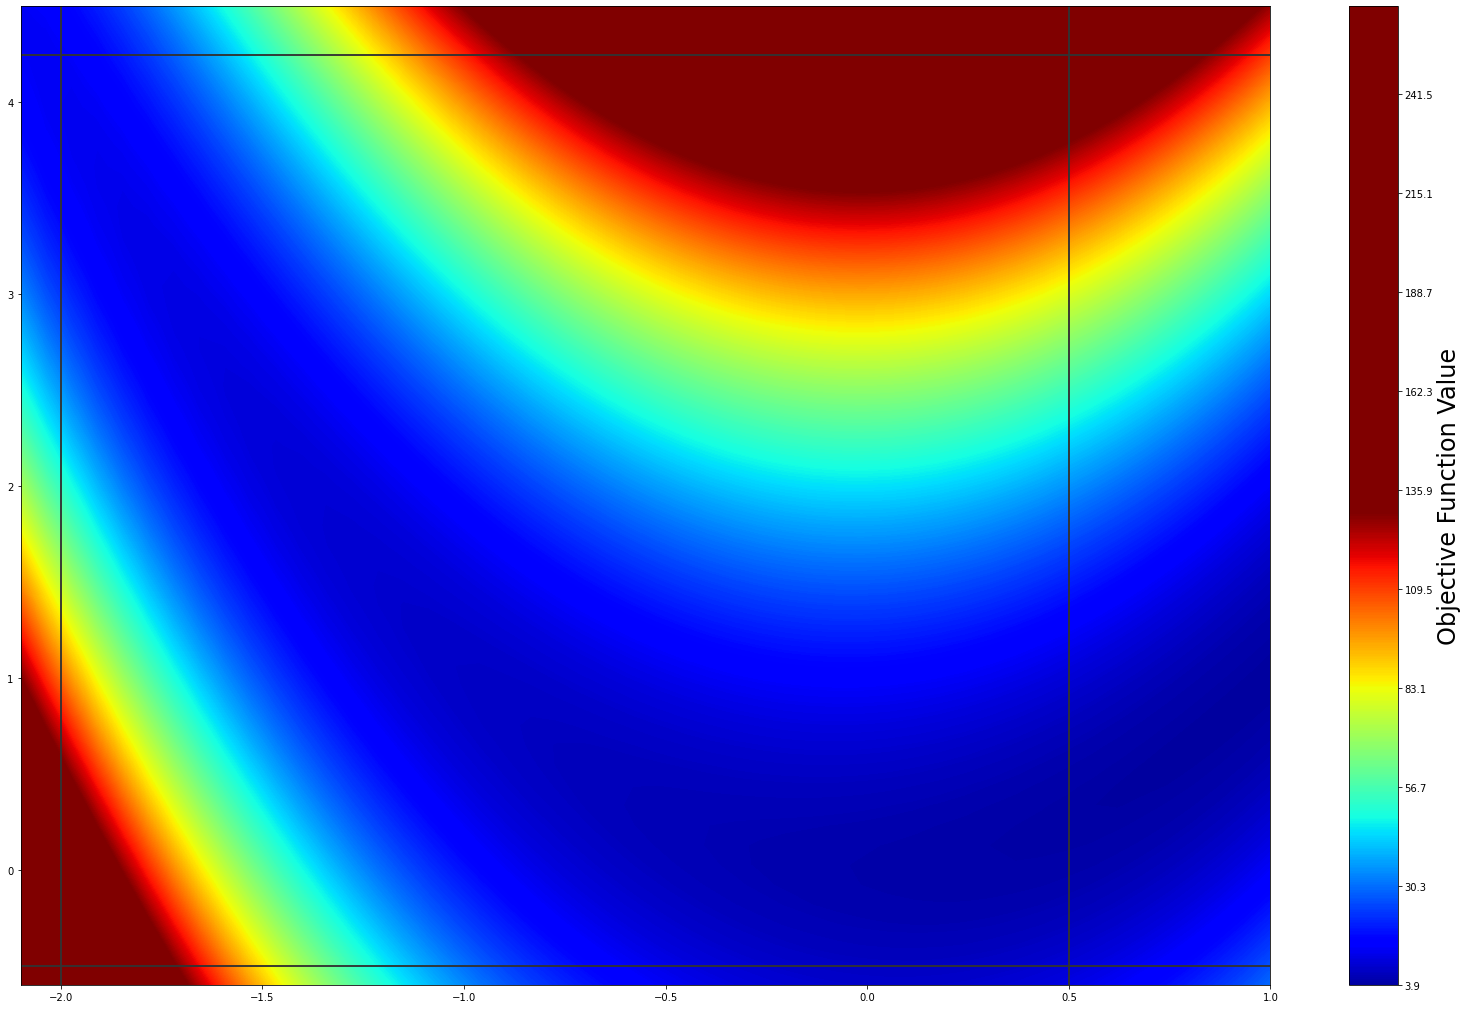

In [21]:
from ipywidgets import interactive
interactive(BFGS,angle=[30,0,15,30,45,60,75,90,105,120,135,150,165,180,195,210,225,240,255,270,285,300,315,330,345,360],angle2=[45,0,15,30,45,60,75,90,105,120,135,150,165,180,195,210,225,240,255,270,285,300,315,330,345,360],dimensions=[2,3],colormap=['jet', 'jet_r','Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']\
,vmax=(10,250,5),alpha= (0,1,.1))#vmax=[40,5,10,15,20,25,30,35,40,45,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150]


In [6]:
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

In [7]:
xk=[-1,3.5]